In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
claim=pd.read_csv('Auto_insurance_claims_amount.csv')
claim.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df=pd.DataFrame(data=claim)
df.tail()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large
9133,Y167826,US,MO,Missouri,261.183687,No,Extended,College,2/14/11,Unemployed,...,90,0,1,Corporate Auto,Corporate L3,Other,Call Center,369.600000,Two-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

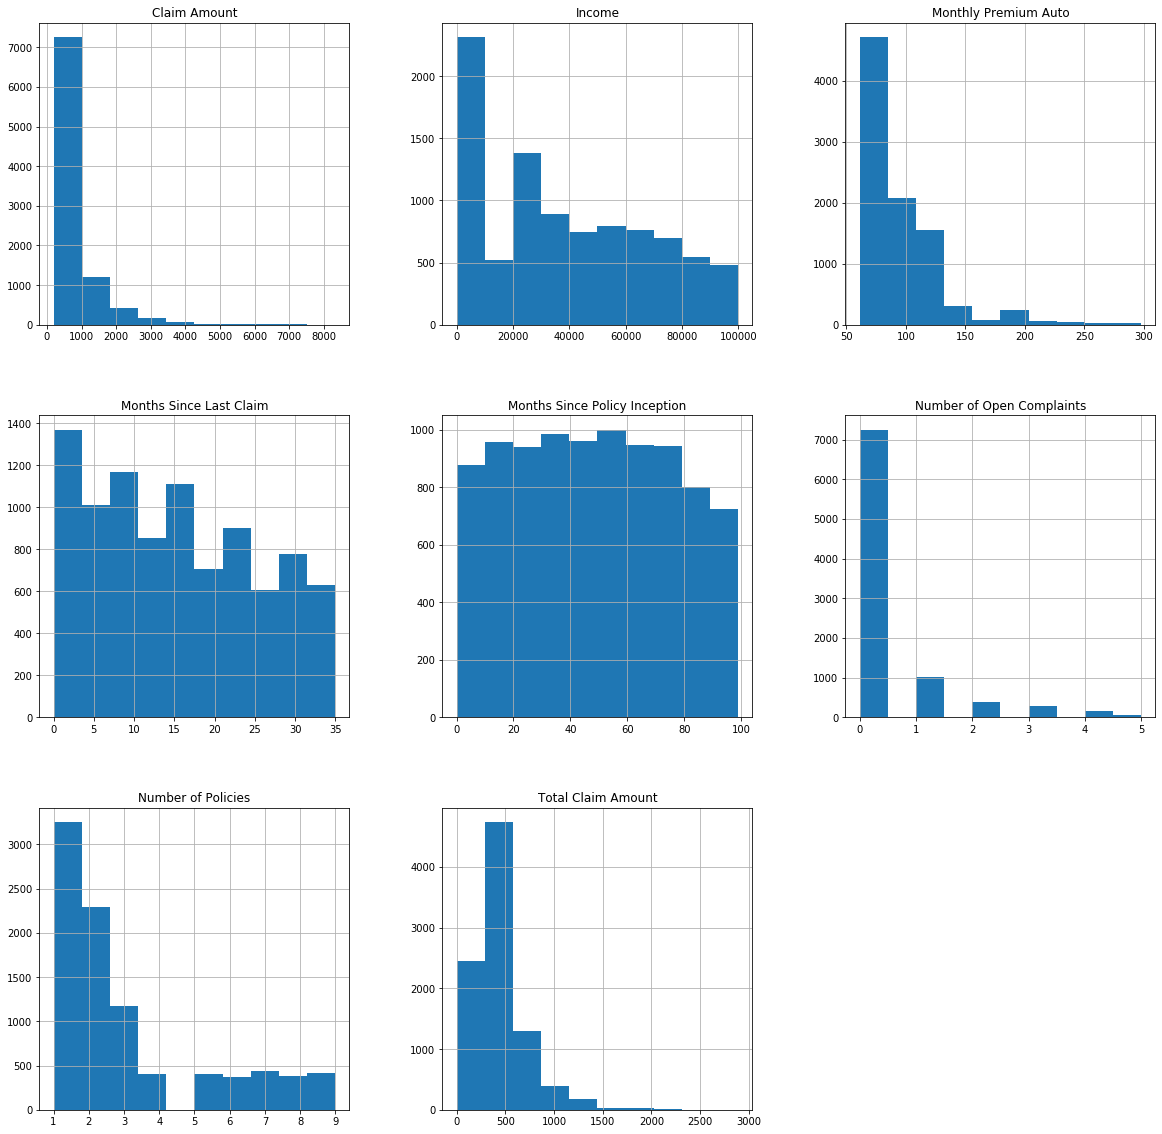

In [6]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2272d805f08>,
 'caps': [<matplotlib.lines.Line2D at 0x2272d809ec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2272d805488>],
 'medians': [<matplotlib.lines.Line2D at 0x2272d80de48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2272d80df08>],
 'means': []}

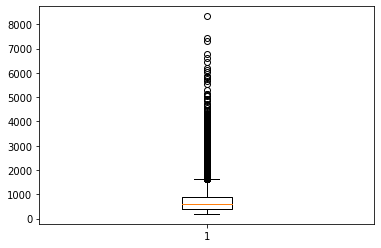

In [7]:
plt.boxplot(df['Claim Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2272cf2a4c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2272cf80f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2272cf7ae08>],
 'medians': [<matplotlib.lines.Line2D at 0x2272cf84ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2272cf89d88>],
 'means': []}

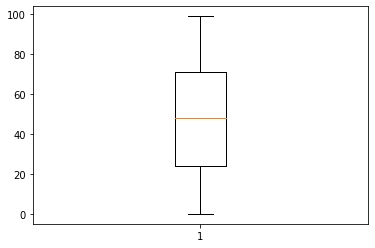

In [8]:
plt.boxplot(df['Months Since Policy Inception'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2272cfae888>,
 'caps': [<matplotlib.lines.Line2D at 0x2272cfeb988>,
 'boxes': [<matplotlib.lines.Line2D at 0x2272cfe1f88>],
 'medians': [<matplotlib.lines.Line2D at 0x2272cff1908>],
 'fliers': [<matplotlib.lines.Line2D at 0x2272cff1f88>],
 'means': []}

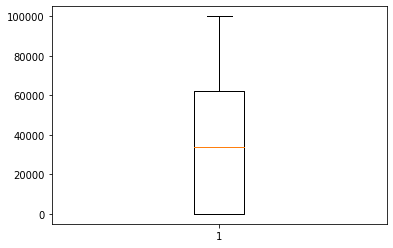

In [9]:
plt.boxplot(df['Income'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x184b6d60288>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x184b6d59f08>,
 'cmins': <matplotlib.collections.LineCollection at 0x184b6d60b48>,
 'cbars': <matplotlib.collections.LineCollection at 0x184b6d60988>}

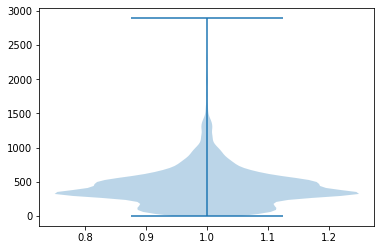

In [10]:
plt.violinplot(df['Total Claim Amount'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x27343485208>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2734333a948>,
 'cmins': <matplotlib.collections.LineCollection at 0x27343485a48>,
 'cbars': <matplotlib.collections.LineCollection at 0x273434888c8>}

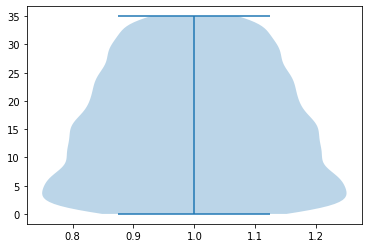

In [11]:
plt.violinplot(df['Months Since Last Claim'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x273434eefc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x273434e80c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x273434f6908>,
 'cbars': <matplotlib.collections.LineCollection at 0x273434f6fc8>}

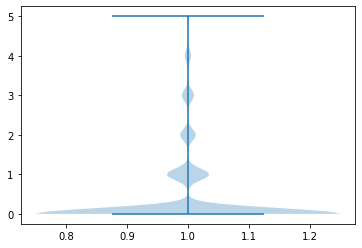

In [12]:
plt.violinplot(df['Number of Open Complaints'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2734355f248>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x273434b1488>,
 'cmins': <matplotlib.collections.LineCollection at 0x2734355fa88>,
 'cbars': <matplotlib.collections.LineCollection at 0x27343566908>}

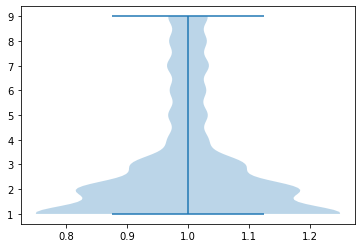

In [13]:
plt.violinplot(df['Number of Policies'])

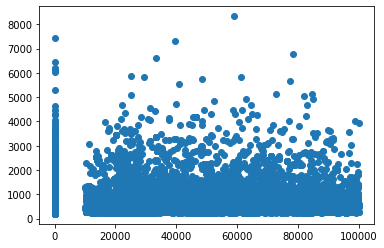

In [14]:
plt.scatter('Income','Claim Amount',data=df)

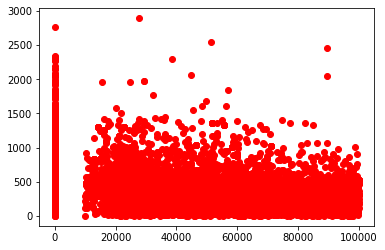

In [15]:
plt.scatter('Income','Total Claim Amount',c='r',data=df)

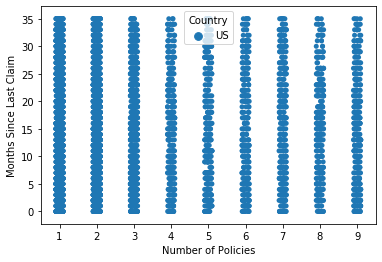

In [16]:
sns.stripplot('Number of Policies','Months Since Last Claim',hue='Country',data=df)

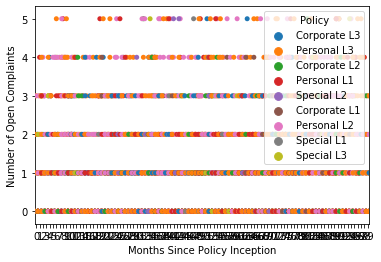

In [17]:
sns.swarmplot('Months Since Policy Inception','Number of Open Complaints',hue='Policy',data=df)

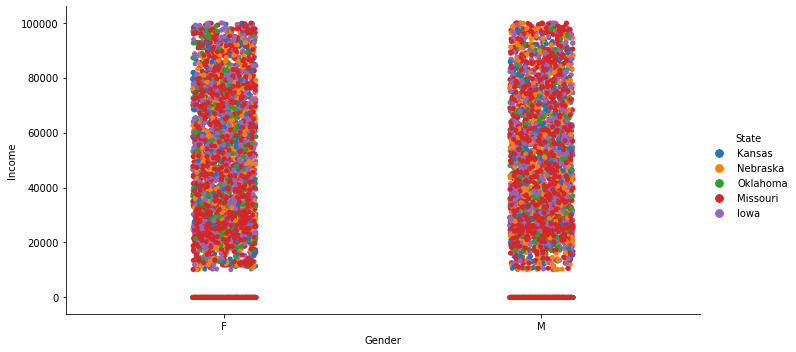

In [18]:
sns.catplot('Gender','Income',hue='State',aspect=2,data=df)

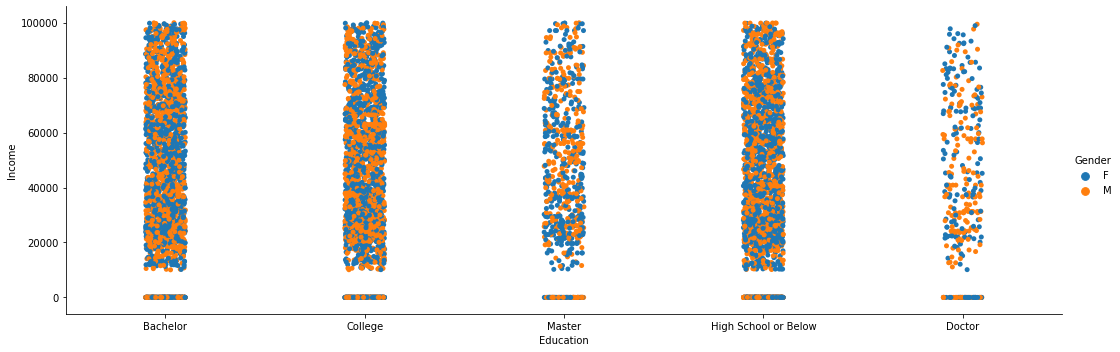

In [19]:
sns.catplot('Education','Income',hue='Gender',height=5,aspect=3,data=df,kind='strip')

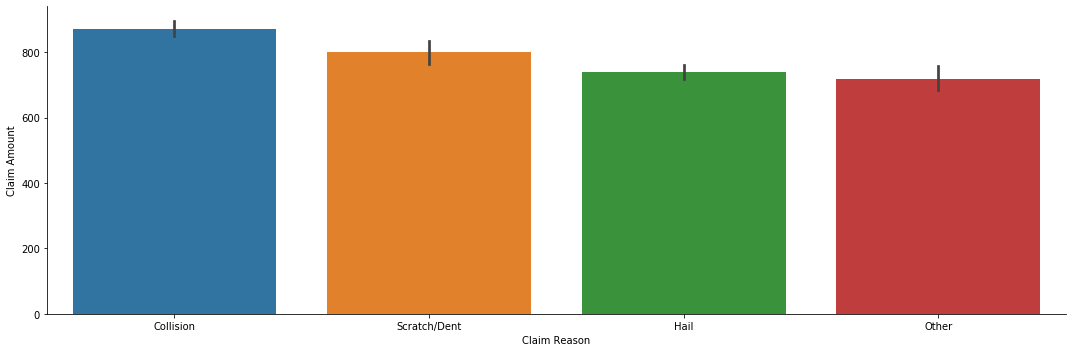

In [20]:
sns.catplot('Claim Reason','Claim Amount',height=5,aspect=3,data=df,kind='bar')

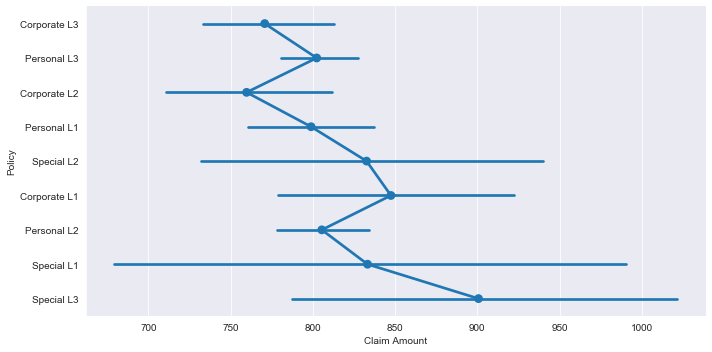

In [23]:
sns.set_style('darkgrid')
sns.catplot('Claim Amount','Policy',aspect=2,data=df,kind='point')

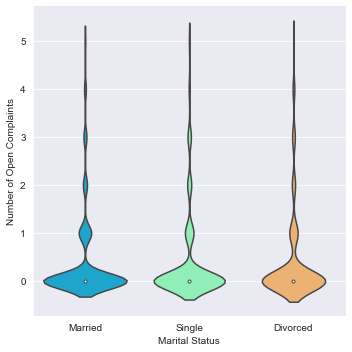

In [33]:
sns.catplot('Marital Status','Number of Open Complaints',data=df,kind='violin',palette='rainbow')

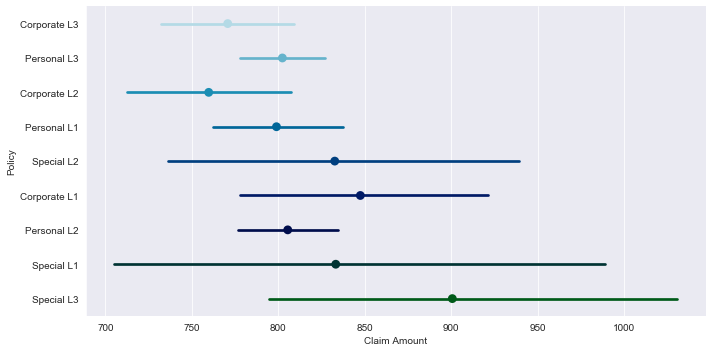

In [34]:
sns.catplot('Claim Amount','Policy',aspect=2,data=df,kind='point',palette='ocean_r')

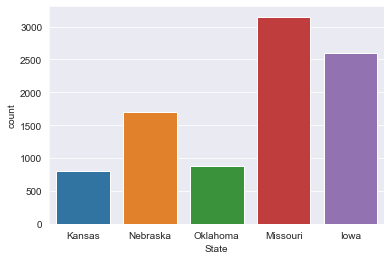

In [24]:
sns.countplot(df['State'])

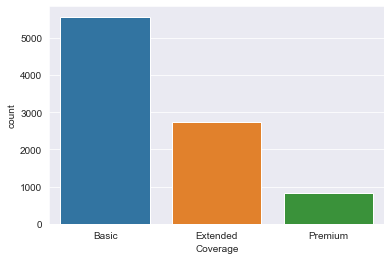

In [25]:
sns.countplot(df['Coverage'])

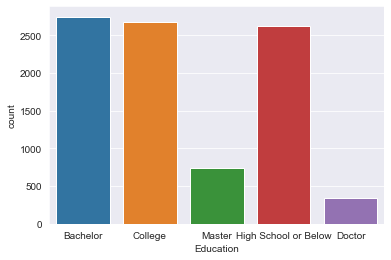

In [26]:
sns.countplot(df['Education'])

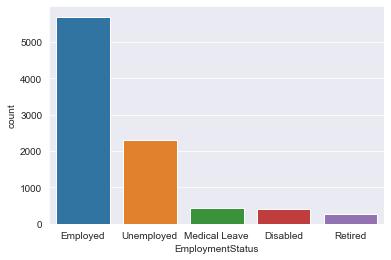

In [28]:
sns.countplot(df['EmploymentStatus'])

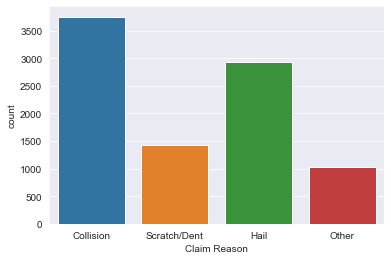

In [29]:
sns.countplot(df['Claim Reason'])

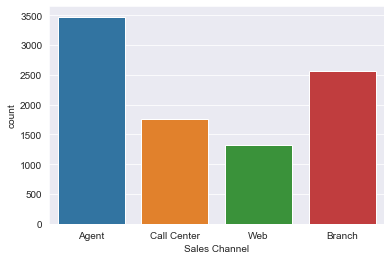

In [30]:
sns.countplot(df['Sales Channel'])

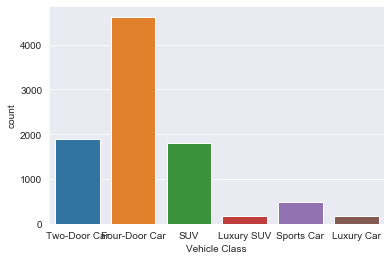

In [31]:
sns.countplot(df['Vehicle Class'])

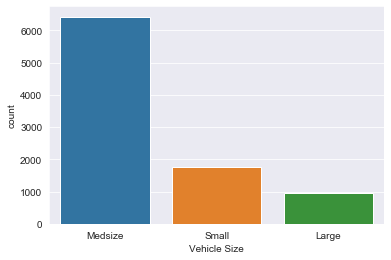

In [32]:
sns.countplot(df['Vehicle Size'])

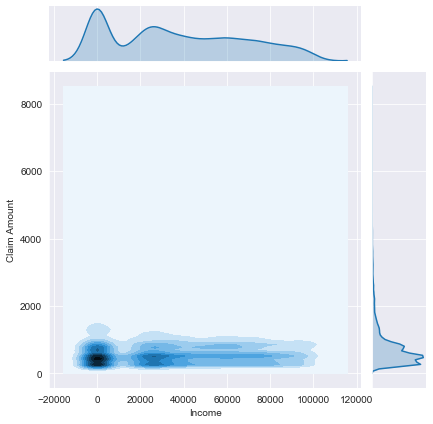

In [35]:
sns.jointplot('Income','Claim Amount',data=df,height=6,ratio=5,space=.2,kind='kde')

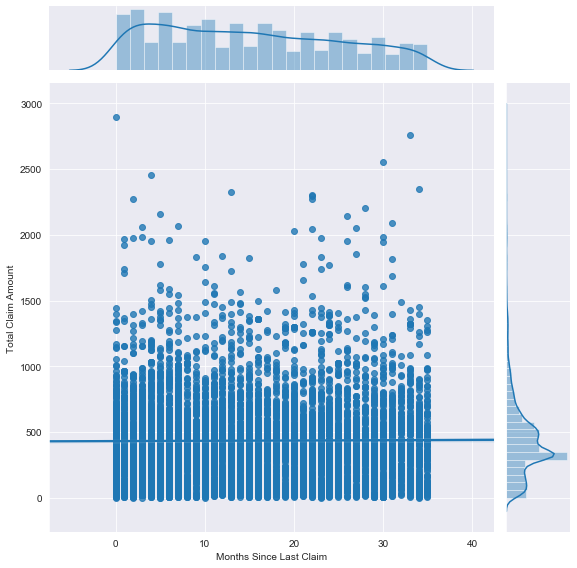

In [42]:
sns.jointplot('Months Since Last Claim','Total Claim Amount',data=df,height=8,ratio=6,space=0.2,kind='reg')

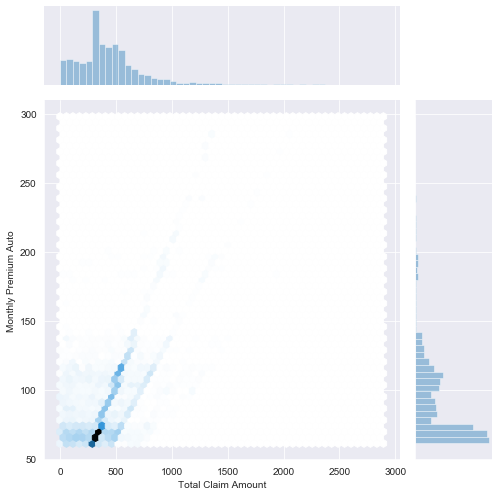

In [45]:
sns.jointplot('Total Claim Amount','Monthly Premium Auto',data=df,height=7,ratio=4,space=.2,kind='hex')

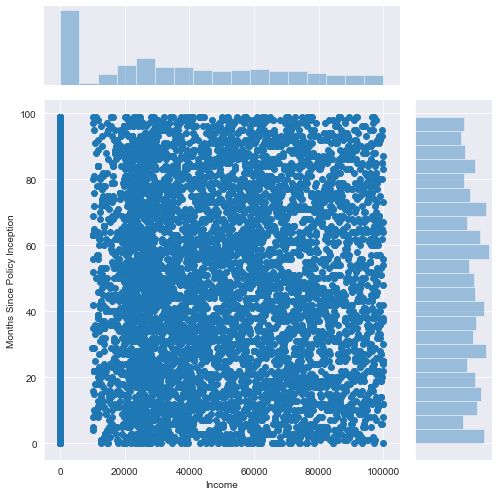

In [47]:
sns.jointplot('Income','Months Since Policy Inception',data=df,height=7,ratio=4,space=.2,kind='scatter')

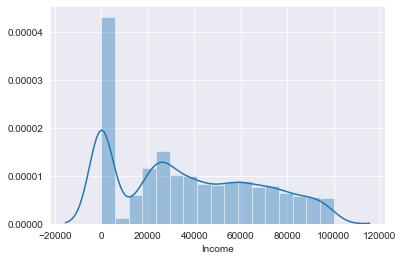

In [48]:
sns.distplot(df['Income'])

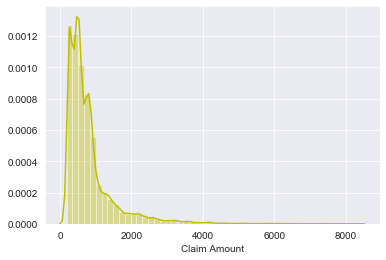

In [49]:
sns.distplot(df['Claim Amount'],color='y')

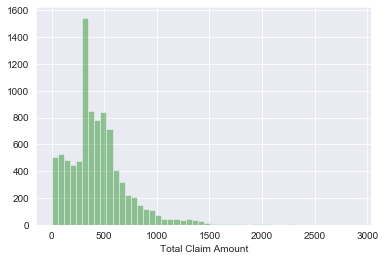

In [52]:
sns.distplot(df['Total Claim Amount'],kde=False,color='g')

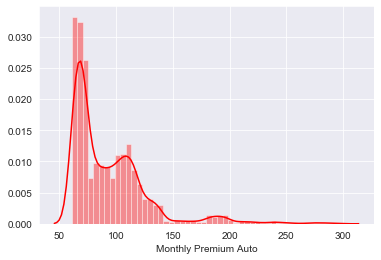

In [53]:
sns.distplot(df['Monthly Premium Auto'],rug=False,color='r')

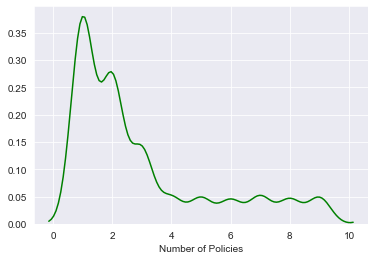

In [54]:
sns.distplot(df['Number of Policies'],hist=False,color='g')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies'],
       dtype='object'),
 dtype('float64'): Index(['Claim Amount', 'Total Claim Amount'], dtype='object'),
 dtype('O'): Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
        'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type', 'Policy',
        'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
       dtype='object')}

In [9]:
df.shape

(9134, 26)

In [10]:
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

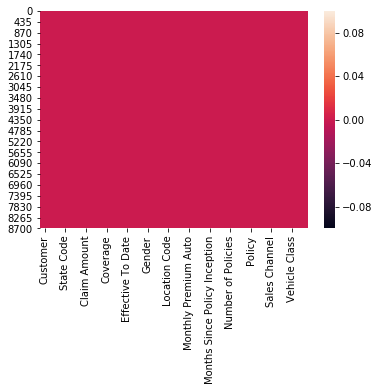

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [13]:
df.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [14]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [15]:
df['Country'].unique()

array(['US'], dtype=object)

In [16]:
df['State Code'].unique()

array(['KS', 'NE', 'OK', 'MO', 'IA'], dtype=object)

In [17]:
df['State'].unique()

array(['Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'], dtype=object)

In [18]:
df['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [20]:
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [21]:
df['Effective To Date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [22]:
df['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [23]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
df['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [25]:
df['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [26]:
df['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [27]:
df['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [28]:
df['Claim Reason'].unique()

array(['Collision', 'Scratch/Dent', 'Hail', 'Other'], dtype=object)

In [29]:
df['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [30]:
df['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [31]:
df['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df.shape

(9134, 26)

In [34]:
df.drop(['Customer','Effective To Date'],axis=1,inplace=True)

In [35]:
df.shape

(9134, 24)

In [36]:
df.head()

,Country,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,US,KS,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,US,NE,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,US,MO,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,US,KS,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [37]:
le=LabelEncoder()

In [38]:
le_count=0

for col in df.columns[0:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 9:
            le.fit(df[col])
            df[col]=le.transform(df[col])
            le_count +=1
print('{} columns were labell encoded.'.format(le_count))

16 columns were labell encoded.


In [39]:
df.skew()

Country                          0.000000
State Code                       0.021065
State                            0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
EmploymentStatus                 0.832147
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1.714966
Vehicle Class                    0.395146
Vehicle Size                     0

Country                            AxesSubplot(0.125,0.787927;0.0824468x0.0920732)
State Code                       AxesSubplot(0.223936,0.787927;0.0824468x0.0920...
State                            AxesSubplot(0.322872,0.787927;0.0824468x0.0920...
Claim Amount                     AxesSubplot(0.421809,0.787927;0.0824468x0.0920...
Response                         AxesSubplot(0.520745,0.787927;0.0824468x0.0920...
Coverage                         AxesSubplot(0.619681,0.787927;0.0824468x0.0920...
Education                        AxesSubplot(0.718617,0.787927;0.0824468x0.0920...
EmploymentStatus                 AxesSubplot(0.817553,0.787927;0.0824468x0.0920...
Gender                             AxesSubplot(0.125,0.677439;0.0824468x0.0920732)
Income                           AxesSubplot(0.223936,0.677439;0.0824468x0.0920...
Location Code                    AxesSubplot(0.322872,0.677439;0.0824468x0.0920...
Marital Status                   AxesSubplot(0.421809,0.677439;0.0824468x0.0920...
Mont

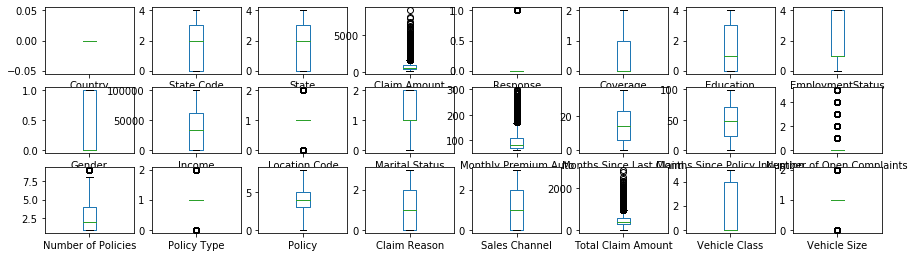

In [40]:
df.plot(kind='box',subplots=True,layout=(7,8),figsize=(15,10))

In [41]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int32'): Index(['Country', 'State Code', 'State', 'Response', 'Coverage', 'Education',
        'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
        'Policy Type', 'Policy', 'Claim Reason', 'Sales Channel',
        'Vehicle Class', 'Vehicle Size'],
       dtype='object'),
 dtype('int64'): Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies'],
       dtype='object'),
 dtype('float64'): Index(['Claim Amount', 'Total Claim Amount'], dtype='object')}

In [42]:
df.head()

,Country,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,1,276.351928,0,0,0,1,0,56274,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,3,3,697.953590,0,1,0,4,0,0,...,42,0,8,1,5,3,0,1131.464935,0,1
2,0,4,4,1288.743165,0,2,0,1,0,48767,...,38,0,2,1,5,0,0,566.472247,5,1
3,0,2,2,764.586183,0,0,0,4,1,0,...,65,0,7,0,1,0,2,529.881344,3,1
4,0,1,1,281.369258,0,0,0,1,1,43836,...,44,0,1,1,3,0,0,138.130879,0,1


In [43]:
x=df.drop('Claim Amount',axis=1)
x.shape

(9134, 23)

In [44]:
y=df['Claim Amount']
y.shape

(9134,)

In [45]:
y=le.fit_transform(y)
y

array([ 975, 4659, 6900, ..., 5516, 5041,  688], dtype=int64)

In [46]:
models=[KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),MultinomialNB()]

In [47]:
max_r2_score=0
for r_state in range(40,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_test,predm)
        print('Accuracy score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_r2_score,'and models is',final_model)

Accuracy score correspond to random state 40 is 0.046163684687330786
Accuracy score correspond to random state 40 is 0.9424182618653232
Accuracy score correspond to random state 40 is 0.9670155205526347
Accuracy score correspond to random state 40 is -0.3552248617612723
Accuracy score correspond to random state 41 is 0.05020463652497287
Accuracy score correspond to random state 41 is 0.9470063734141537
Accuracy score correspond to random state 41 is 0.9688697339026942
Accuracy score correspond to random state 41 is -0.47771197595939396
Accuracy score correspond to random state 42 is 0.033193083200359075
Accuracy score correspond to random state 42 is 0.9515647437455744
Accuracy score correspond to random state 42 is 0.9705009140224178
Accuracy score correspond to random state 42 is -0.33209686091853086
Accuracy score correspond to random state 43 is 0.04892865825176229
Accuracy score correspond to random state 43 is 0.9542337433758483
Accuracy score correspond to random state 43 is 0.9

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=47)

In [49]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
predrfr=rfr.predict(x_test)
print('R2 Score:',r2_score(y_test,predrfr))
print('Mean squared error:',mean_squared_error(y_test,predrfr))
print('Mean absolute error:',mean_absolute_error(y_test,predrfr))
print('Square root means:',np.sqrt(mean_absolute_error(y_test,predrfr)))

R2 Score: 0.9731874227342552
Mean squared error: 144264.63841791046
Mean absolute error: 191.57432835820896
Square root means: 13.841037835300103


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
rfr=RandomForestRegressor()
parameter={'n_estimators':range(10,40),'criterion':('mse','mae')}
grid=GridSearchCV(estimator=rfr,param_grid=parameter)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'mse', 'n_estimators': 30}


In [53]:
rfr=RandomForestRegressor(n_estimators=30,criterion='mse')
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
predrfr=rfr.predict(x_test)
print('R2 Score:',r2_score(y_test,predrfr))
print('Mean squared error:',mean_squared_error(y_test,predrfr))
print('Mean absolute error:',mean_absolute_error(y_test,predrfr))
print('Square root means:',np.sqrt(mean_absolute_error(y_test,predrfr)))

R2 Score: 0.9737988003464754
Mean squared error: 140975.13106135986
Mean absolute error: 189.23389718076282
Square root means: 13.756231212827256


In [54]:
fraud=pd.read_csv('Automobile_insurance_fraud.csv')
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [55]:
df1=pd.DataFrame(data=fraud)
df1.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [56]:
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [57]:
df1.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

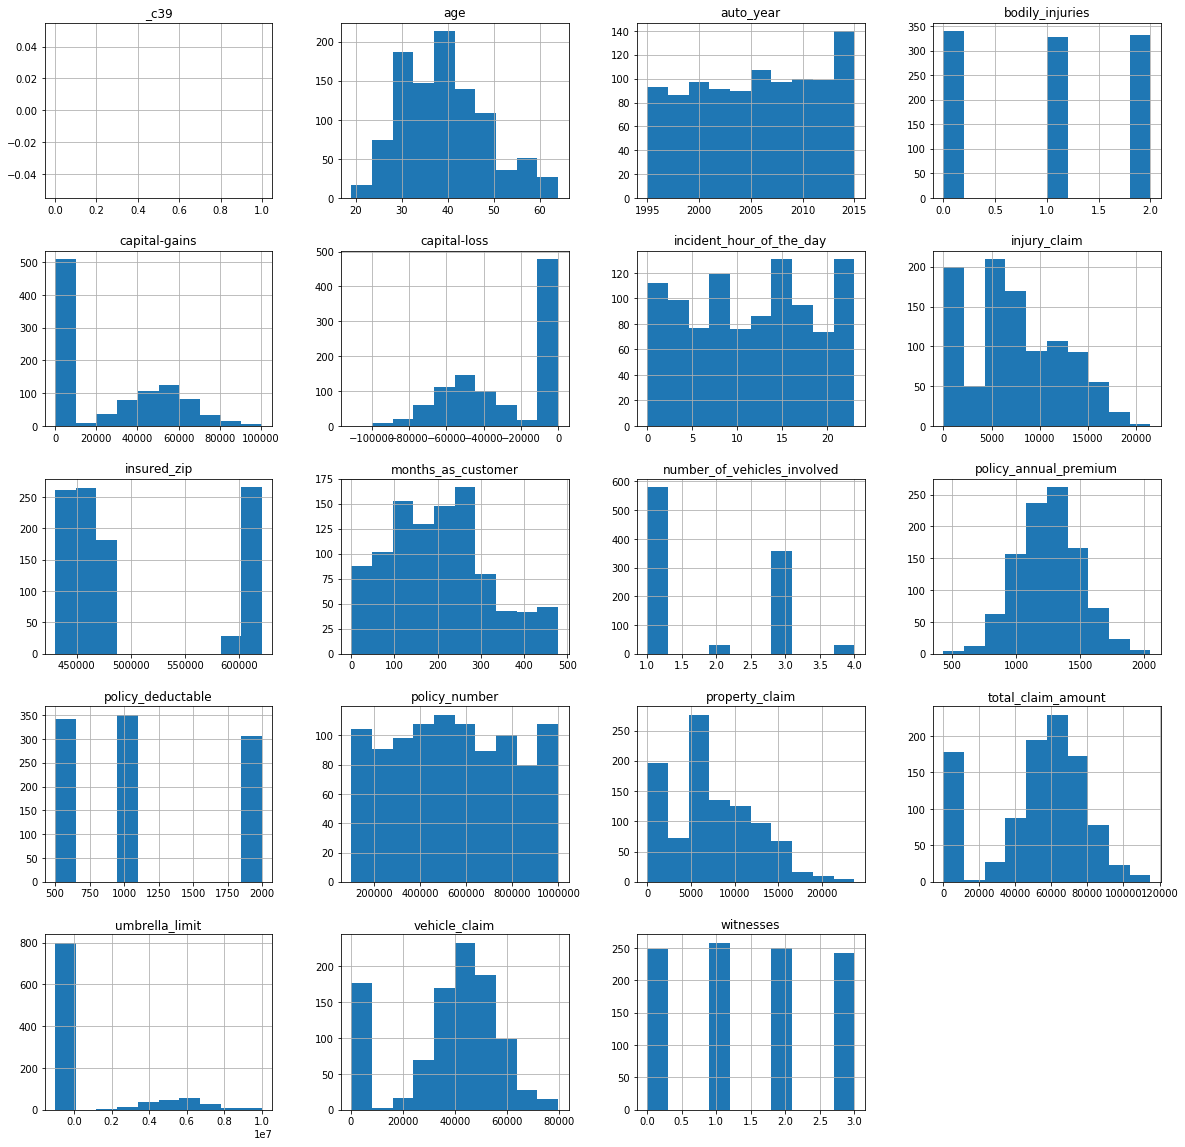

In [58]:
df1.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2273399a5c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2273399f508>,
 'boxes': [<matplotlib.lines.Line2D at 0x2273399a4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22732814948>],
 'fliers': [<matplotlib.lines.Line2D at 0x22733982d08>],
 'means': []}

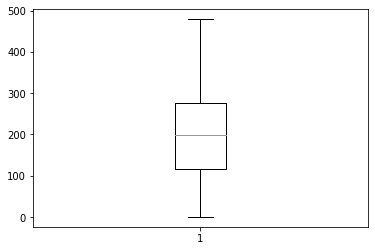

In [59]:
plt.boxplot(df1['months_as_customer'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17804decac8>,
 'caps': [<matplotlib.lines.Line2D at 0x17804decf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x17804dbc548>],
 'medians': [<matplotlib.lines.Line2D at 0x17804df1f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x17804df1fc8>],
 'means': []}

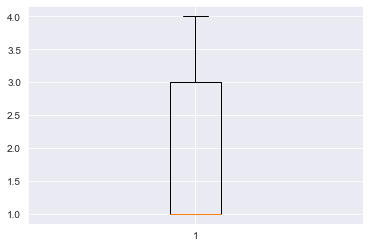

In [116]:
plt.boxplot(df1['number_of_vehicles_involved'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x17804fb2b08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x17804e43cc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x17804fb2a08>,
 'cbars': <matplotlib.collections.LineCollection at 0x17804fb2d48>}

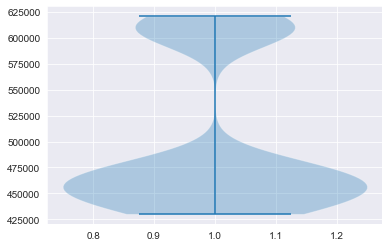

In [120]:
plt.violinplot(df1['insured_zip'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1780501ffc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1780501ff48>,
 'cmins': <matplotlib.collections.LineCollection at 0x17805028a08>,
 'cbars': <matplotlib.collections.LineCollection at 0x17805028e88>}

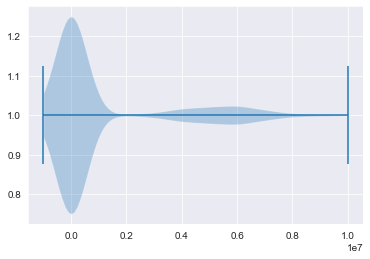

In [122]:
plt.violinplot(df1['umbrella_limit'],vert=False)

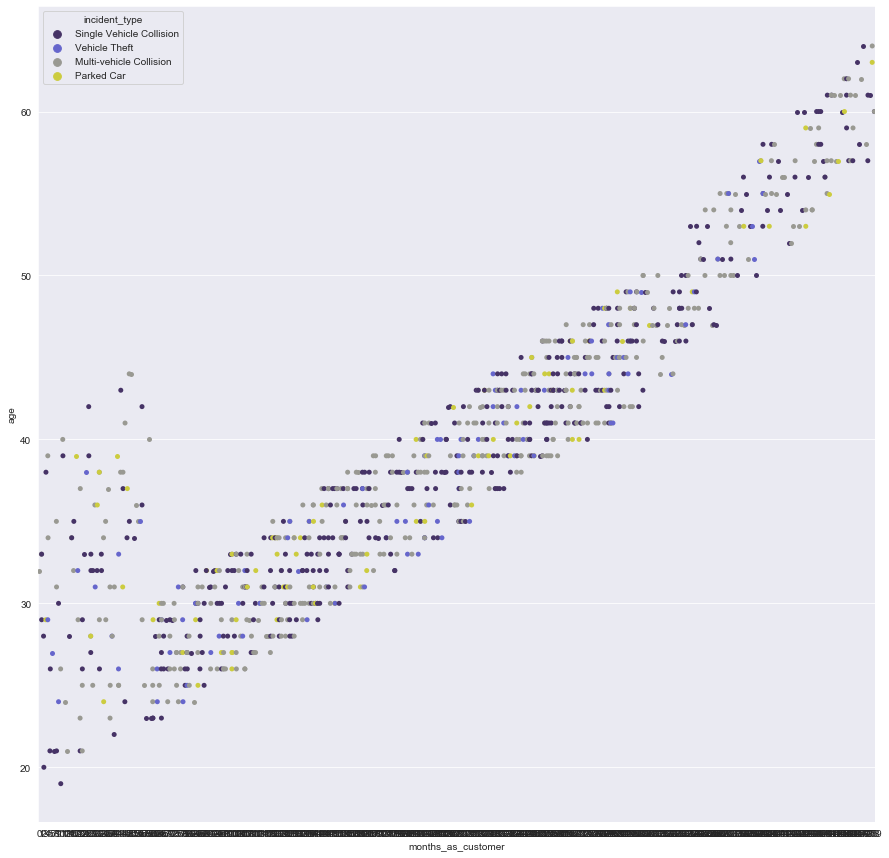

In [127]:
plt.figure(figsize=(15,15))
sns.stripplot('months_as_customer','age',hue='incident_type',data=df1,palette='gist_stern')

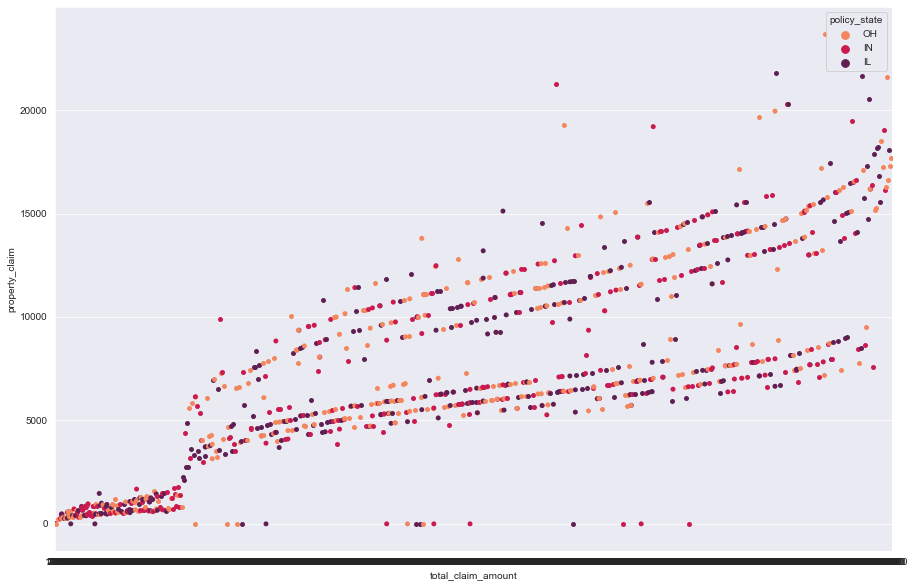

In [131]:
plt.figure(figsize=(15,10))
sns.swarmplot('total_claim_amount','property_claim',hue='policy_state',data=df1,palette='rocket_r')

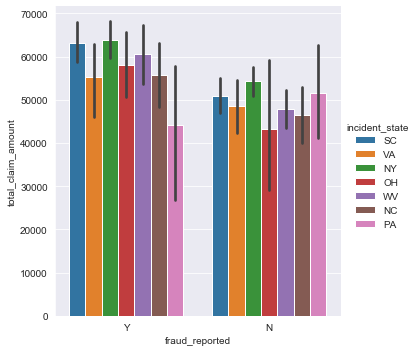

In [132]:
sns.catplot('fraud_reported','total_claim_amount',hue='incident_state',data=df1,kind='bar')

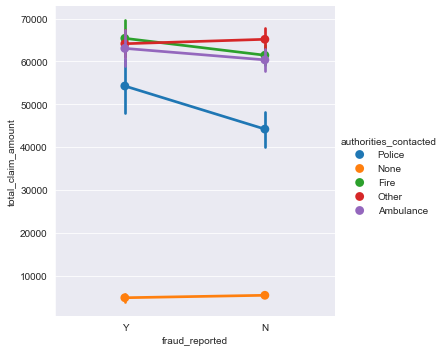

In [133]:
sns.catplot('fraud_reported','total_claim_amount',hue='authorities_contacted',data=df1,kind='point')

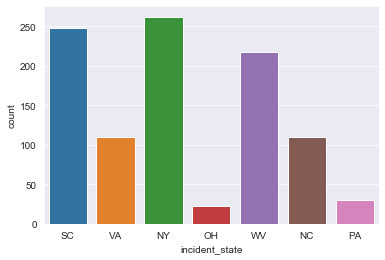

In [135]:
sns.countplot(df1['incident_state'])

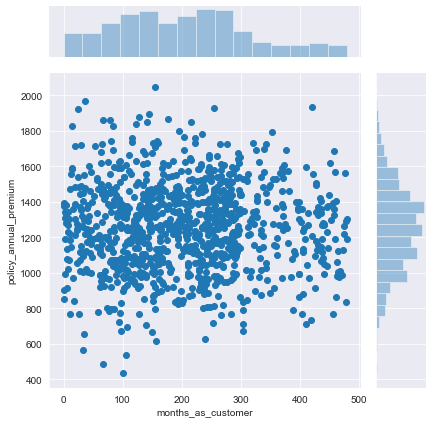

In [136]:
sns.jointplot('months_as_customer','policy_annual_premium',height=6,ratio=5,space=.3,data=df1)

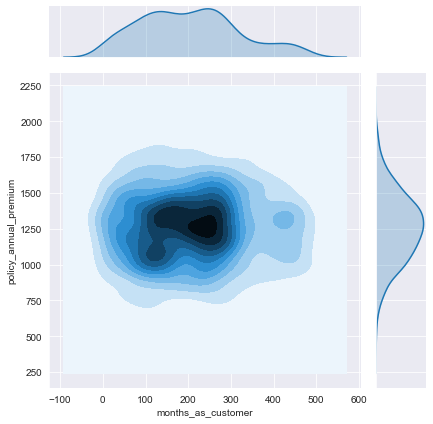

In [137]:
sns.jointplot('months_as_customer','policy_annual_premium',height=6,ratio=5,space=.3,data=df1,kind='kde')

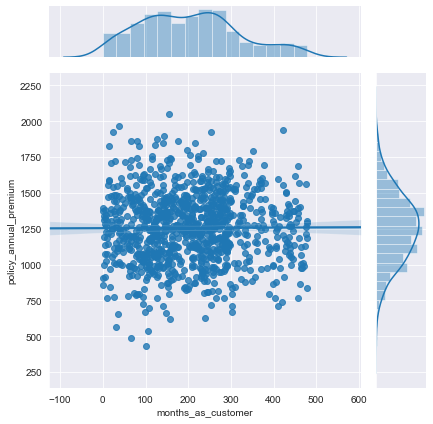

In [138]:
sns.jointplot('months_as_customer','policy_annual_premium',height=6,ratio=5,space=.3,data=df1,kind='reg')

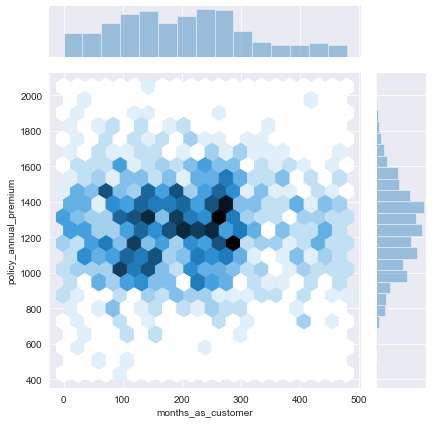

In [139]:
sns.jointplot('months_as_customer','policy_annual_premium',height=6,ratio=5,space=.3,data=df1,kind='hex')

In [59]:
df1.columns.to_series().groupby(df1.dtypes).groups

{dtype('int64'): Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
        'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
        'incident_hour_of_the_day', 'number_of_vehicles_involved',
        'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
        'property_claim', 'vehicle_claim', 'auto_year'],
       dtype='object'),
 dtype('float64'): Index(['policy_annual_premium', '_c39'], dtype='object'),
 dtype('O'): Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_date', 'incident_type',
        'collision_type', 'incident_severity', 'authorities_contacted',
        'incident_state', 'incident_city', 'incident_location',
        'property_damage', 'police_report_available', 'auto_make', 'auto_model',
        'fraud_reported'],
       dtype='object')}

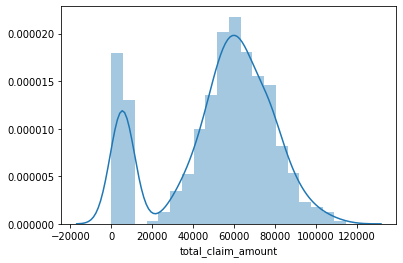

In [61]:
sns.distplot(df1['total_claim_amount'])

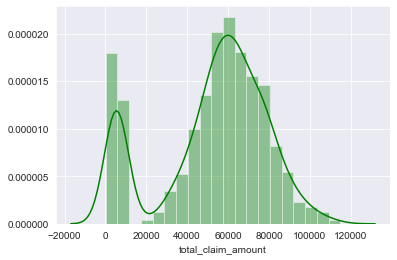

In [142]:
sns.distplot(df1['total_claim_amount'],color='g')

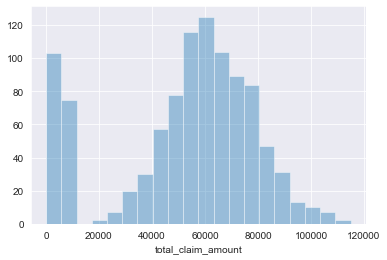

In [143]:
sns.distplot(df1['total_claim_amount'],kde=False)

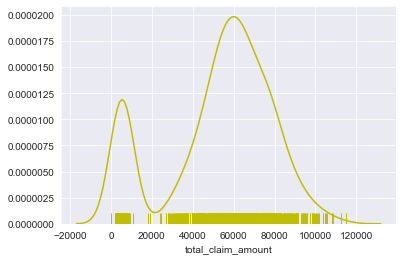

In [145]:
sns.distplot(df1['total_claim_amount'],rug=True,hist=False,color='y')

In [60]:
df1['_c39'].unique()

array([nan])

In [61]:
df1.drop('_c39',axis=1,inplace=True)

In [62]:
df1.shape

(1000, 39)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [64]:
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [65]:
df.isnull().sum()

Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

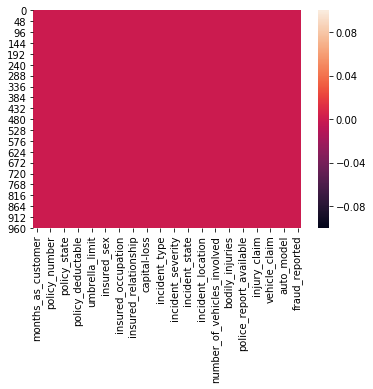

In [66]:
sns.heatmap(df1.isnull())

In [67]:
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [68]:
import datetime as dt
df1['policy_bind_date']=pd.to_datetime(df1['policy_bind_date'])

In [69]:
df1['policy_bind_date']=df1['policy_bind_date'].map(dt.datetime.toordinal)

In [70]:
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,735523,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,732489,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,730280,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,726612,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,735390,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [71]:
df1.drop(['policy_csl','auto_model'],axis=1,inplace=True)

In [72]:
df1.shape

(1000, 37)

In [73]:
df1['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [74]:
df1['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [75]:
df1['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [76]:
df1['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [77]:
df1['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [78]:
df1['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [79]:
df1.drop('incident_date',axis=1,inplace=True)

In [80]:
df1['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [81]:
df1['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [82]:
df1['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [83]:
df1['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [84]:
df1['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [85]:
df1['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [86]:
df1.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,730889.164000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,2689.367808,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,726469.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,728509.500000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,730947.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,733159.500000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,735658.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [87]:
df1.columns.to_series().groupby(df1.dtypes).groups

{dtype('int64'): Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
        'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains',
        'capital-loss', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
        'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
        'auto_year'],
       dtype='object'),
 dtype('float64'): Index(['policy_annual_premium'], dtype='object'),
 dtype('O'): Index(['policy_state', 'insured_sex', 'insured_education_level',
        'insured_occupation', 'insured_hobbies', 'insured_relationship',
        'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city',
        'incident_location', 'property_damage', 'police_report_available',
        'auto_make', 'fraud_reported'],
       dtype='object')}

In [88]:
le_count=0

for col in df1.columns[0:]:
    if df1[col].dtype == 'object':
        if len(list(df1[col].unique())) <= 21:
            le.fit(df1[col])
            df1[col]=le.transform(df1[col])
            le_count +=1
print('{} columns were labell encoded.'.format(le_count))

16 columns were labell encoded.


In [89]:
df1['incident_location']=le.fit_transform(df1['incident_location'])

In [90]:
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,521585,735523,2,1000,1406.91,0,466132,1,...,1,2,2,71610,6510,13020,52080,10,2004,1
1,228,42,342868,732489,1,2000,1197.22,5000000,468176,1,...,0,0,0,5070,780,780,3510,8,2007,1
2,134,29,687698,730280,2,2000,1413.14,5000000,430632,0,...,2,3,1,34650,7700,3850,23100,4,2007,0
3,256,41,227811,726612,0,2000,1415.74,6000000,608117,0,...,1,2,1,63400,6340,6340,50720,3,2014,1
4,228,44,367455,735390,0,1000,1583.91,6000000,610706,1,...,0,1,1,6500,1300,650,4550,0,2009,0


In [91]:
df1.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,730889.164000,1.01400,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,2689.367808,0.83096,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,6.015861,0.431483
min,0.000000,19.000000,100804.000000,726469.000000,0.00000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,728509.500000,0.00000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,730947.000000,1.00000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,733159.500000,2.00000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,735658.000000,2.00000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,2015.000000,1.000000


In [92]:
df1.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [93]:
df1.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.046979
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


Country                            AxesSubplot(0.125,0.787927;0.0824468x0.0920732)
State Code                       AxesSubplot(0.223936,0.787927;0.0824468x0.0920...
State                            AxesSubplot(0.322872,0.787927;0.0824468x0.0920...
Claim Amount                     AxesSubplot(0.421809,0.787927;0.0824468x0.0920...
Response                         AxesSubplot(0.520745,0.787927;0.0824468x0.0920...
Coverage                         AxesSubplot(0.619681,0.787927;0.0824468x0.0920...
Education                        AxesSubplot(0.718617,0.787927;0.0824468x0.0920...
EmploymentStatus                 AxesSubplot(0.817553,0.787927;0.0824468x0.0920...
Gender                             AxesSubplot(0.125,0.677439;0.0824468x0.0920732)
Income                           AxesSubplot(0.223936,0.677439;0.0824468x0.0920...
Location Code                    AxesSubplot(0.322872,0.677439;0.0824468x0.0920...
Marital Status                   AxesSubplot(0.421809,0.677439;0.0824468x0.0920...
Mont

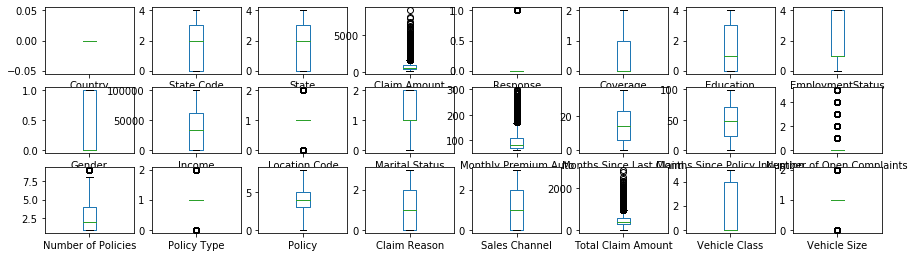

In [94]:
df.plot(kind='box',subplots=True,layout=(7,8),figsize=(15,10))

In [95]:
zscore(df1)

array([[ 1.07813958,  0.99083647, -0.09595307, ...,  0.85646614,
        -0.1834404 ,  1.74601919],
       [ 0.2089946 ,  0.33407345, -0.79152739, ...,  0.36053902,
         0.31549088,  1.74601919],
       [-0.60800168, -1.08891308,  0.55056594, ..., -0.63131523,
         0.31549088, -0.57273139],
       ...,
       [-0.64276748, -0.54161057,  1.44891961, ...,  1.1044297 ,
        -1.5139238 , -0.57273139],
       [ 2.20802805,  2.52328351, -0.04786687, ..., -1.37520591,
        -1.18130295, -0.57273139],
       [ 2.19064515,  2.3043625 ,  0.03830297, ...,  0.36053902,
         0.31549088, -0.57273139]])

In [96]:
z=np.abs(zscore(df1))
print(z)

[[1.07813958 0.99083647 0.09595307 ... 0.85646614 0.1834404  1.74601919]
 [0.2089946  0.33407345 0.79152739 ... 0.36053902 0.31549088 1.74601919]
 [0.60800168 1.08891308 0.55056594 ... 0.63131523 0.31549088 0.57273139]
 ...
 [0.64276748 0.54161057 1.44891961 ... 1.1044297  1.5139238  0.57273139]
 [2.20802805 2.52328351 0.04786687 ... 1.37520591 1.18130295 0.57273139]
 [2.19064515 2.3043625  0.03830297 ... 0.36053902 0.31549088 0.57273139]]


In [97]:
threshold=3
print(np.where(z<3))
print(df1.shape)

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64), array([ 0,  1,  2, ..., 33, 34, 35], dtype=int64))
(1000, 36)


In [98]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)

In [99]:
IQR=Q3-Q1
IQR

months_as_customer                160.5000
age                                12.0000
policy_number                  423119.5000
policy_bind_date                 4650.0000
policy_state                        2.0000
policy_deductable                1500.0000
policy_annual_premium             326.0875
umbrella_limit                      0.0000
insured_zip                    154846.5000
insured_sex                         1.0000
insured_education_level             4.0000
insured_occupation                  7.0000
insured_hobbies                    10.0000
insured_relationship                3.0000
capital-gains                   51025.0000
capital-loss                    51500.0000
incident_type                       2.0000
collision_type                      2.0000
incident_severity                   2.0000
authorities_contacted               3.0000
incident_state                      4.0000
incident_city                       4.0000
incident_location                 499.5000
incident_ho

In [100]:
df1_new=df1[(z<3).all(axis=1)]

In [101]:
print(df1.shape)
print(df1_new.shape)

(1000, 36)
(980, 36)


In [102]:
df1=df1_new
df1.shape

(980, 36)

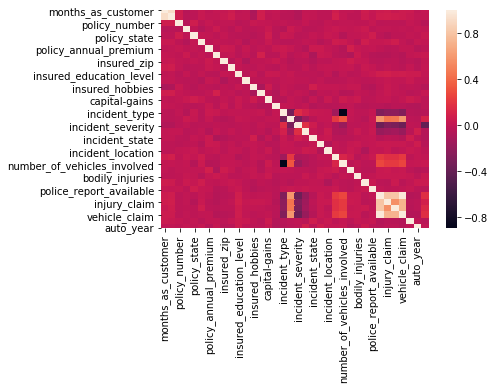

In [103]:
sns.heatmap(df1.corr())

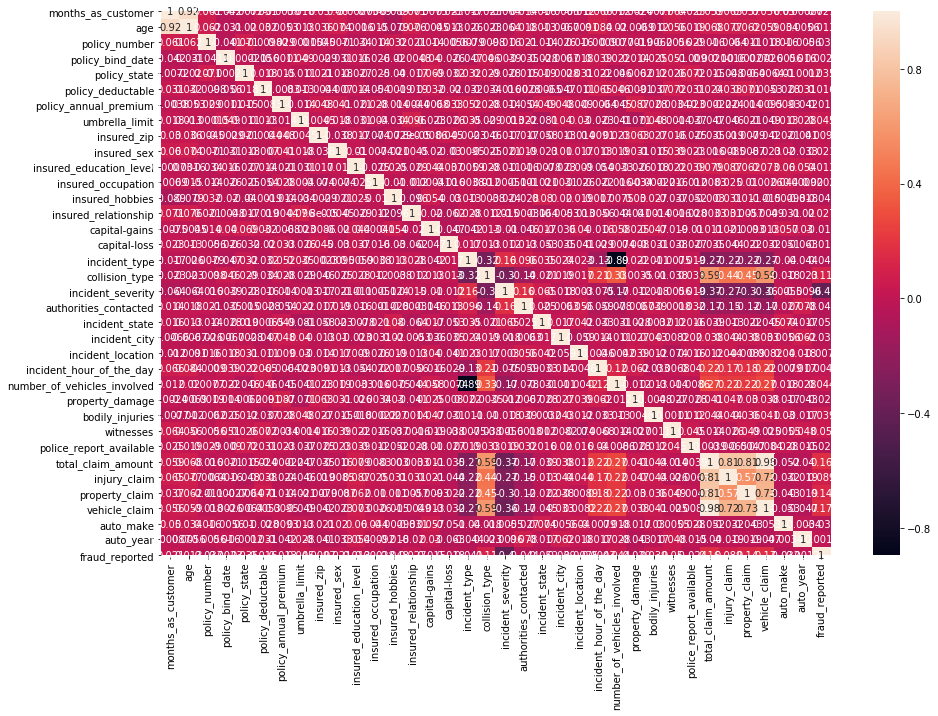

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

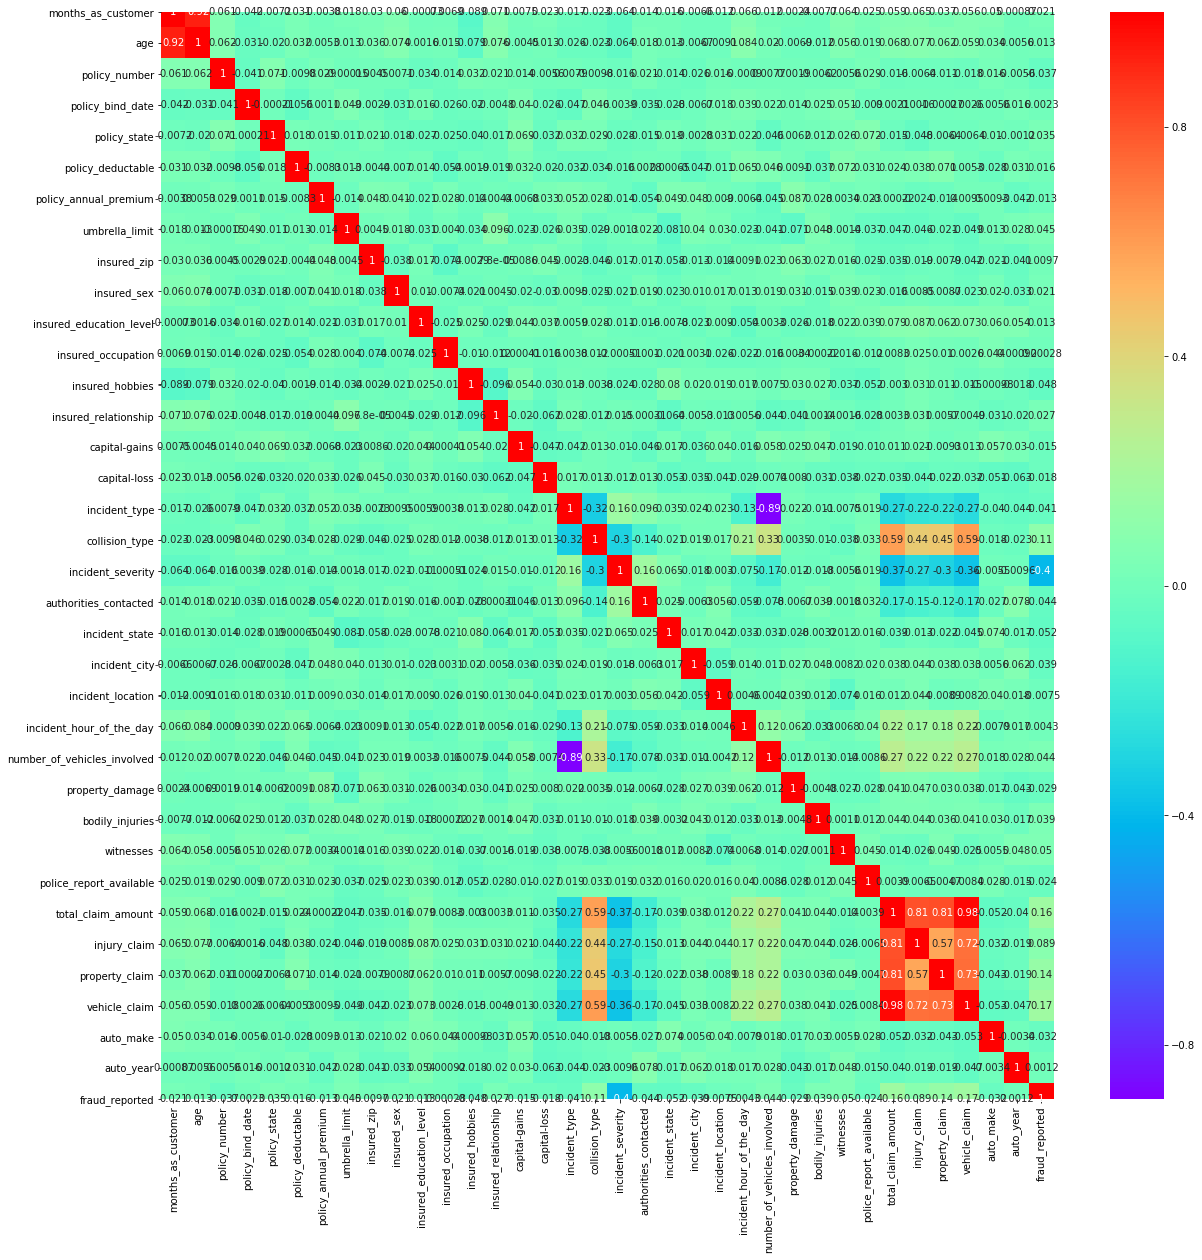

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cmap='rainbow',annot=True)

In [106]:
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,521585,735523,2,1000,1406.91,0,466132,1,...,1,2,2,71610,6510,13020,52080,10,2004,1
1,228,42,342868,732489,1,2000,1197.22,5000000,468176,1,...,0,0,0,5070,780,780,3510,8,2007,1
2,134,29,687698,730280,2,2000,1413.14,5000000,430632,0,...,2,3,1,34650,7700,3850,23100,4,2007,0
3,256,41,227811,726612,0,2000,1415.74,6000000,608117,0,...,1,2,1,63400,6340,6340,50720,3,2014,1
4,228,44,367455,735390,0,1000,1583.91,6000000,610706,1,...,0,1,1,6500,1300,650,4550,0,2009,0


In [107]:
x=df1.drop('fraud_reported',axis=1)
x.shape

(980, 35)

In [108]:
y=df1['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [109]:
models_fraud=[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

In [133]:
max_accu_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for m in models_fraud:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accu_value=accuracy_score(y_test,predm)
        print('Accuracy score correspond to random state',r_state ,'is',accu_value)
        if accu_value>max_accu_score:
            max_accu_score=accu_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_accu_score,'and model_fraud is',final_model)

Accuracy score correspond to random state 40 is 0.8055555555555556
Accuracy score correspond to random state 40 is 0.7037037037037037
Accuracy score correspond to random state 40 is 0.7638888888888888
Accuracy score correspond to random state 41 is 0.7824074074074074
Accuracy score correspond to random state 41 is 0.6851851851851852
Accuracy score correspond to random state 41 is 0.7685185185185185
Accuracy score correspond to random state 42 is 0.7685185185185185
Accuracy score correspond to random state 42 is 0.7175925925925926
Accuracy score correspond to random state 42 is 0.7314814814814815
Accuracy score correspond to random state 43 is 0.7592592592592593
Accuracy score correspond to random state 43 is 0.7037037037037037
Accuracy score correspond to random state 43 is 0.7268518518518519
Accuracy score correspond to random state 44 is 0.7731481481481481
Accuracy score correspond to random state 44 is 0.6527777777777778
Accuracy score correspond to random state 44 is 0.712962962962

In [134]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)

In [135]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8009259259259259
[[150  15]
 [ 28  23]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       165
           1       0.61      0.45      0.52        51

    accuracy                           0.80       216
   macro avg       0.72      0.68      0.70       216
weighted avg       0.79      0.80      0.79       216



In [136]:
parameter={'criterion':('gini','entropy')}
grid=GridSearchCV(dt,parameter)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'entropy'}


In [138]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8101851851851852
[[149  16]
 [ 25  26]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1       0.62      0.51      0.56        51

    accuracy                           0.81       216
   macro avg       0.74      0.71      0.72       216
weighted avg       0.80      0.81      0.80       216



In [139]:
from sklearn.externals import joblib

In [140]:
joblib.dump(dt,'AutomobileFile.obj')

['AutomobileFile.obj']